<a href="https://colab.research.google.com/github/avilaJorge/CSE253_FinalProject/blob/master/DeepFakeDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);
"""

'\nfunction ConnectButton(){\n    console.log("Connect pushed"); \n    document.querySelector("#connect").click()\n}\nsetInterval(ConnectButton,60000);\n'

In [0]:
#!wget https://storage.googleapis.com/img-hosting-bucket/LSUN_BCC_256.hdf5

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp -r /content/drive/'My Drive'/CSE253/CSE253_FinalProject/* .

In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Mar 16 05:43:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%run DeepFake_Dataloader.py
%run utils.py

In [7]:
# imports pytorch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Numpy, Matplotlib, and PIL
import numpy as np
import matplotlib.pyplot as plt

# K-means import
!pip install pykeops
from pykeops.torch import LazyTensor
!pip install kmeans-pytorch
from kmeans_pytorch import kmeans

# general imports
import pprint

# My imports
from DeepFake_Dataloader import get_dataloaders
from models import LinearRegression, DNN, save_model
from utils import RunningAverage
from train import train, evaluate

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
s_epoch      = 1
num_epochs   = 20
lr_rate      = 1e-2
load_model   = False
model_name   = 'DNNModel'
path         = '/content/drive/My Drive/CSE253/CSE253_FinalProject/DNN'

def runDNN(queries):
  dataset      = DeepFakeHDF5Dataset(hdf5_path="./LSUN_BCC_256.hdf5", queries=queries)

  trn_dl, val_dl, tst_dl = get_dataloaders(dataset=dataset)

  lr_model = DNN(182).to(device)
  criterion = torch.nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

  if load_model:
      lr_model.load_state_dict(torch.load(''))

  train_losses, valid_losses = train(lr_model, 
                                  optimizer, 
                                  criterion, 
                                  trn_dl, 
                                  val_dl,
                                  model_name,
                                  path,
                                  predicter=torch.nn.Sigmoid(),
                                  num_epochs=num_epochs)

  epochs = range(1, len(train_losses) + 1)
  epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
      
  # plt.figure(figsize=(10,6))
  plt.plot(epochs, train_losses, label='Training loss')
  plt.plot(epochs, valid_losses, label='Validation loss')
  plt.legend()
  plt.title('Learning curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.xticks(epoch_ticks)
  plt.show()

  test_losses = []
  evaluate(lr_model,
          optimizer,
          criterion,
          0,
          tst_dl,
          test_losses,
          "",
          "",
          acc_thresh=0.5,
          predicter=torch.nn.Sigmoid(),
          validation=False)

Epoch:  1
Training loss: 0.3441


Training Loss:  0.311
Training accuracy: 87.5927%


Validation Loss:  0.3245
Validation accuracy: 87.2750%
"Best Loss": 0.3245118269696832

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.193


Training Loss:  0.1491
Training accuracy: 94.4921%


Validation Loss:  0.1448
Validation accuracy: 94.6250%
"Best Loss": 0.14476683759130535

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.159


Training Loss:  0.1644
Training accuracy: 94.0338%


Validation Loss:  0.162
Validation accuracy: 94.4250%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.1888


Training Loss:  0.1254
Training accuracy: 95.6004%


Validation Loss:  0.1215
Validation accuracy: 95.4250%
"Best Loss": 0.12148844299372286

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.1285


Training Loss:  0.12
Training accuracy: 95.9753%


Validation Loss:  0.1191
Validation accuracy: 95.9250%
"Best Loss": 0.11908111209049821

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.1311


Training Loss:  0.1646
Training accuracy: 93.3839%


Validation Loss:  0.1626
Validation accuracy: 92.9750%
Validation Loss has gone up 1 times.



Epoch:  7
Training loss: 0.1105


Training Loss:  0.1091
Training accuracy: 96.2753%


Validation Loss:  0.1101
Validation accuracy: 96.0500%
"Best Loss": 0.11009710060898215

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.1134


Training Loss:  0.1626
Training accuracy: 94.1422%


Validation Loss:  0.166
Validation accuracy: 93.8750%
Validation Loss has gone up 1 times.



Epoch:  9
Training loss: 0.1177


Training Loss:  0.1025
Training accuracy: 96.4836%


Validation Loss:  0.1041
Validation accuracy: 96.3750%
"Best Loss": 0.1040593043435365

Validation Loss has gone up 0 times.



Epoch:  10
Training loss: 0.1185


Training Loss:  0.1203
Training accuracy: 95.7670%


Validation Loss:  0.1145
Validation accuracy: 96.0500%
Validation Loss has gone up 1 times.



Epoch:  11
Training loss: 0.1044


Training Loss:  0.1461
Training accuracy: 94.2088%


Validation Loss:  0.1427
Validation accuracy: 94.7500%
Validation Loss has gone up 2 times.



Epoch:  12
Training loss: 0.1183


Training Loss:  0.1012
Training accuracy: 96.5253%


Validation Loss:  0.1019
Validation accuracy: 96.5000%
"Best Loss": 0.10191989236045629

Validation Loss has gone up 0 times.



Epoch:  13
Training loss: 0.1204


Training Loss:  0.0952
Training accuracy: 96.6503%


Validation Loss:  0.0986
Validation accuracy: 96.5500%
"Best Loss": 0.0986130884848535

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.103


Training Loss:  0.0974
Training accuracy: 96.4920%


Validation Loss:  0.0994
Validation accuracy: 96.3250%
Validation Loss has gone up 1 times.



Epoch:  15
Training loss: 0.1093


Training Loss:  0.1224
Training accuracy: 95.2504%


Validation Loss:  0.1249
Validation accuracy: 95.2500%
Validation Loss has gone up 2 times.



Epoch:  16
Training loss: 0.1131


Training Loss:  0.087
Training accuracy: 97.0336%


Validation Loss:  0.0859
Validation accuracy: 96.8000%
"Best Loss": 0.08594449900556356

Validation Loss has gone up 0 times.



Epoch:  17
Training loss: 0.1312


Training Loss:  0.0968
Training accuracy: 96.3503%


Validation Loss:  0.0989
Validation accuracy: 96.2250%
Validation Loss has gone up 1 times.



Epoch:  18
Training loss: 0.1541


Training Loss:  0.1112
Training accuracy: 96.0003%


Validation Loss:  0.1071
Validation accuracy: 95.8500%
Validation Loss has gone up 2 times.



Epoch:  19
Training loss: 0.1625


Training Loss:  0.0919
Training accuracy: 96.9586%


Validation Loss:  0.0994
Validation accuracy: 96.6750%
Validation Loss has gone up 0 times.



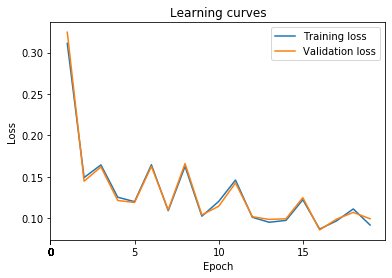

Validation Loss:  0.1149
Validation accuracy: 96.9000%


In [9]:
runDNN(['cats'])

Epoch:  1
Training loss: 0.5884


Training Loss:  0.5169
Training accuracy: 75.7937%


Validation Loss:  0.515
Validation accuracy: 75.5250%
"Best Loss": 0.5149817168712615

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.5351


Training Loss:  0.5485
Training accuracy: 70.3108%


Validation Loss:  0.5354
Validation accuracy: 71.4500%
Validation Loss has gone up 1 times.



Epoch:  3
Training loss: 0.4799


Training Loss:  0.4635
Training accuracy: 77.9852%


Validation Loss:  0.4542
Validation accuracy: 78.4000%
"Best Loss": 0.4541898798197508

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.4749


Training Loss:  0.4568
Training accuracy: 80.7183%


Validation Loss:  0.4609
Validation accuracy: 80.3250%
Validation Loss has gone up 1 times.



Epoch:  5
Training loss: 0.4809


Training Loss:  0.4488
Training accuracy: 79.9850%


Validation Loss:  0.4525
Validation accuracy: 79.3500%
"Best Loss": 0.45249712374061346

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.4646


Training Loss:  0.488
Training accuracy: 76.4853%


Validation Loss:  0.4952
Validation accuracy: 75.6250%
Validation Loss has gone up 1 times.



Epoch:  7
Training loss: 0.4789


Training Loss:  0.4659
Training accuracy: 77.9852%


Validation Loss:  0.4697
Validation accuracy: 77.5750%
Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.4701


Training Loss:  0.5122
Training accuracy: 75.4437%


Validation Loss:  0.5107
Validation accuracy: 75.8000%
Validation Loss has gone up 1 times.



Epoch:  9
Training loss: 0.4887


Training Loss:  0.5475
Training accuracy: 71.6274%


Validation Loss:  0.554
Validation accuracy: 71.1250%
Validation Loss has gone up 2 times.



Epoch:  10
Training loss: 0.465


Training Loss:  0.4152
Training accuracy: 80.8433%


Validation Loss:  0.4164
Validation accuracy: 81.6500%
"Best Loss": 0.4164383867755532

Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.455


Training Loss:  0.4945
Training accuracy: 77.6019%


Validation Loss:  0.5028
Validation accuracy: 76.8250%
Validation Loss has gone up 1 times.



Epoch:  12
Training loss: 0.4523


Training Loss:  0.4595
Training accuracy: 78.7518%


Validation Loss:  0.472
Validation accuracy: 78.0250%
Validation Loss has gone up 0 times.



Epoch:  13
Training loss: 0.4384


Training Loss:  0.4033
Training accuracy: 82.1348%


Validation Loss:  0.4087
Validation accuracy: 81.3750%
"Best Loss": 0.4087314261123538

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.4534


Training Loss:  0.5313
Training accuracy: 76.4270%


Validation Loss:  0.5409
Validation accuracy: 75.2250%
Validation Loss has gone up 1 times.



Epoch:  15
Training loss: 0.4406


Training Loss:  0.4859
Training accuracy: 76.0937%


Validation Loss:  0.4935
Validation accuracy: 75.6250%
Validation Loss has gone up 0 times.



Epoch:  16
Training loss: 0.4465


Training Loss:  0.43
Training accuracy: 79.4934%


Validation Loss:  0.4275
Validation accuracy: 79.6750%
Validation Loss has gone up 0 times.



Epoch:  17
Training loss: 0.4487


Training Loss:  0.3933
Training accuracy: 82.7931%


Validation Loss:  0.4015
Validation accuracy: 81.9500%
"Best Loss": 0.40146213583648205

Validation Loss has gone up 0 times.



Epoch:  18
Training loss: 0.4383


Training Loss:  0.4586
Training accuracy: 77.7519%


Validation Loss:  0.4547
Validation accuracy: 78.3500%
Validation Loss has gone up 1 times.



Epoch:  19
Training loss: 0.4466


Training Loss:  0.4532
Training accuracy: 78.5601%


Validation Loss:  0.465
Validation accuracy: 77.4750%
Validation Loss has gone up 2 times.



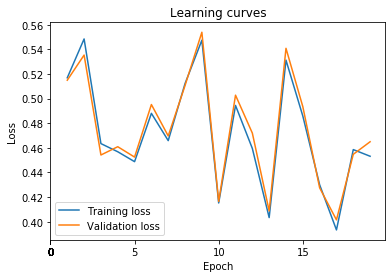

Validation Loss:  0.4622
Validation accuracy: 77.0500%


In [10]:
runDNN(['churches'])

Epoch:  1
Training loss: 0.6224


Training Loss:  0.5301
Training accuracy: 75.2917%


Validation Loss:  0.5467
Validation accuracy: 72.9750%
"Best Loss": 0.5467045269906521

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.5475


Training Loss:  0.5701
Training accuracy: 69.6833%


Validation Loss:  0.5867
Validation accuracy: 68.4000%
Validation Loss has gone up 1 times.



Epoch:  3
Training loss: 0.4931


Training Loss:  0.5203
Training accuracy: 74.4750%


Validation Loss:  0.5355
Validation accuracy: 73.3500%
"Best Loss": 0.5354888001456857

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.4837


Training Loss:  0.4639
Training accuracy: 78.5000%


Validation Loss:  0.4835
Validation accuracy: 76.2750%
"Best Loss": 0.4834824167191982

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.5112


Training Loss:  0.5961
Training accuracy: 69.7833%


Validation Loss:  0.6122
Validation accuracy: 68.0750%
Validation Loss has gone up 1 times.



Epoch:  6
Training loss: 0.4598


Training Loss:  0.4811
Training accuracy: 77.6417%


Validation Loss:  0.4954
Validation accuracy: 76.2000%
Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.4664


Training Loss:  0.5368
Training accuracy: 74.0500%


Validation Loss:  0.5601
Validation accuracy: 72.1750%
Validation Loss has gone up 1 times.



Epoch:  8
Training loss: 0.479


Training Loss:  0.4131
Training accuracy: 82.2750%


Validation Loss:  0.4331
Validation accuracy: 80.3250%
"Best Loss": 0.43314281571656466

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.4522


Training Loss:  0.478
Training accuracy: 75.8167%


Validation Loss:  0.4992
Validation accuracy: 74.2500%
Validation Loss has gone up 1 times.



Epoch:  10
Training loss: 0.4469


Training Loss:  0.4425
Training accuracy: 79.2000%


Validation Loss:  0.4604
Validation accuracy: 77.8250%
Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.4442


Training Loss:  0.458
Training accuracy: 79.1333%


Validation Loss:  0.476
Validation accuracy: 77.7500%
Validation Loss has gone up 1 times.



Epoch:  12
Training loss: 0.4198


Training Loss:  0.4515
Training accuracy: 78.7917%


Validation Loss:  0.4847
Validation accuracy: 77.3750%
Validation Loss has gone up 2 times.



Epoch:  13
Training loss: 0.4657


Training Loss:  0.4063
Training accuracy: 81.8750%


Validation Loss:  0.4288
Validation accuracy: 79.7000%
"Best Loss": 0.42879766039550304

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.4144


Training Loss:  0.3979
Training accuracy: 83.3500%


Validation Loss:  0.4179
Validation accuracy: 81.2750%
"Best Loss": 0.41785554587841034

Validation Loss has gone up 0 times.



Epoch:  15
Training loss: 0.4344


Training Loss:  0.4047
Training accuracy: 81.0417%


Validation Loss:  0.4311
Validation accuracy: 79.3250%
Validation Loss has gone up 1 times.



Epoch:  16
Training loss: 0.4276


Training Loss:  0.3922
Training accuracy: 82.0750%


Validation Loss:  0.4177
Validation accuracy: 80.5750%
"Best Loss": 0.41774565912783146

Validation Loss has gone up 0 times.



Epoch:  17
Training loss: 0.4486


Training Loss:  0.5262
Training accuracy: 73.5917%


Validation Loss:  0.5484
Validation accuracy: 72.4750%
Validation Loss has gone up 1 times.



Epoch:  18
Training loss: 0.441


Training Loss:  0.4495
Training accuracy: 78.2417%


Validation Loss:  0.4853
Validation accuracy: 76.2500%
Validation Loss has gone up 0 times.



Epoch:  19
Training loss: 0.4184


Training Loss:  0.3648
Training accuracy: 83.8417%


Validation Loss:  0.3896
Validation accuracy: 82.3750%
"Best Loss": 0.3895565699785948

Validation Loss has gone up 0 times.



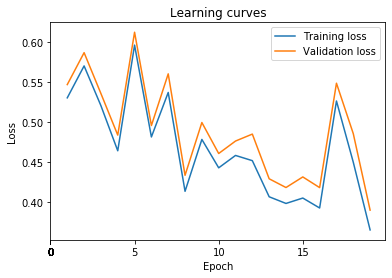

Validation Loss:  0.3888
Validation accuracy: 82.6250%


In [11]:
runDNN(['bedrooms'])

Epoch:  1
Training loss: 0.5199


Training Loss:  0.4734
Training accuracy: 77.1207%


Validation Loss:  0.4712
Validation accuracy: 76.7333%
"Best Loss": 0.4711561158616492

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.4697


Training Loss:  0.4251
Training accuracy: 80.0261%


Validation Loss:  0.4251
Validation accuracy: 79.9167%
"Best Loss": 0.4251201476188416

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.4513


Training Loss:  0.4368
Training accuracy: 78.8540%


Validation Loss:  0.4374
Validation accuracy: 78.5750%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.4552


Training Loss:  0.4649
Training accuracy: 77.3429%


Validation Loss:  0.4628
Validation accuracy: 77.3917%
Validation Loss has gone up 2 times.



Epoch:  5
Training loss: 0.4528


Training Loss:  0.5824
Training accuracy: 70.8711%


Validation Loss:  0.5726
Validation accuracy: 71.8083%
Validation Loss has gone up 3 times.



Epoch:  6
Training loss: 0.4458


Training Loss:  0.417
Training accuracy: 81.0261%


Validation Loss:  0.4188
Validation accuracy: 80.9833%
"Best Loss": 0.4188121237019275

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.4253


Training Loss:  0.4089
Training accuracy: 80.5400%


Validation Loss:  0.4121
Validation accuracy: 79.9417%
"Best Loss": 0.4120526824225771

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.4259


Training Loss:  0.4085
Training accuracy: 80.6511%


Validation Loss:  0.4167
Validation accuracy: 80.0167%
Validation Loss has gone up 1 times.



Epoch:  9
Training loss: 0.4155


Training Loss:  0.4777
Training accuracy: 75.2042%


Validation Loss:  0.4872
Validation accuracy: 74.4833%
Validation Loss has gone up 2 times.



Epoch:  10
Training loss: 0.4215


Training Loss:  0.4272
Training accuracy: 79.7928%


Validation Loss:  0.4323
Validation accuracy: 79.2250%
Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.4072


Training Loss:  0.414
Training accuracy: 80.9511%


Validation Loss:  0.416
Validation accuracy: 80.6833%
Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.4016


Training Loss:  0.444
Training accuracy: 80.7261%


Validation Loss:  0.4486
Validation accuracy: 80.7833%
Validation Loss has gone up 1 times.



Epoch:  13
Training loss: 0.4003


Training Loss:  0.4125
Training accuracy: 80.8427%


Validation Loss:  0.4172
Validation accuracy: 80.7750%
Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.4014


Training Loss:  0.3868
Training accuracy: 81.5205%


Validation Loss:  0.3909
Validation accuracy: 81.2000%
"Best Loss": 0.39088137669766204

Validation Loss has gone up 0 times.



Epoch:  15
Training loss: 0.3968


Training Loss:  0.3778
Training accuracy: 82.2565%


Validation Loss:  0.385
Validation accuracy: 81.8333%
"Best Loss": 0.3849957414129947

Validation Loss has gone up 0 times.



Epoch:  16
Training loss: 0.3936


Training Loss:  0.3897
Training accuracy: 81.9316%


Validation Loss:  0.395
Validation accuracy: 81.3667%
Validation Loss has gone up 1 times.



Epoch:  17
Training loss: 0.3971


Training Loss:  0.3914
Training accuracy: 81.9427%


Validation Loss:  0.398
Validation accuracy: 81.5417%
Validation Loss has gone up 2 times.



Epoch:  18
Training loss: 0.3778


Training Loss:  0.3444
Training accuracy: 84.3870%


Validation Loss:  0.3499
Validation accuracy: 83.8417%
"Best Loss": 0.3498821778500334

Validation Loss has gone up 0 times.



Epoch:  19
Training loss: 0.386


Training Loss:  0.3761
Training accuracy: 82.9954%


Validation Loss:  0.3824
Validation accuracy: 82.4500%
Validation Loss has gone up 1 times.



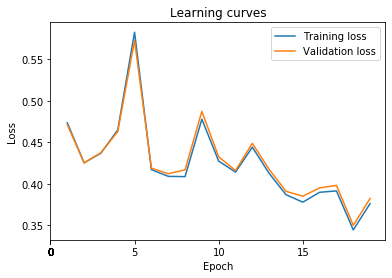

Validation Loss:  0.3762
Validation accuracy: 83.0750%


In [12]:
runDNN([])